<a href="https://colab.research.google.com/github/KhalandarMokula/Coswara-Data/blob/master/Final_Project_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import concatenate,Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from sklearn.metrics import roc_curve
from keras.utils import np_utils
from tqdm import tqdm
import pandas as pd
import numpy as np
import librosa 
import librosa.display
import pylab
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
print(tf.version.VERSION)

Num GPUs Available:  1
2.3.0


In [ ]:
#json_path: where we will store all mfccs and its associated labels

def save_mfcc(dataset_path,json_path):
    pass

In [ ]:
#TESTING CELL
c=0
for dir_path,dir_names,file_names in os.walk('Extracted_data'):
    c+=1
    if c==280:
        print(file_names)


['breathing-deep.wav', 'breathing-shallow.wav', 'cough-heavy.wav', 'cough-shallow.wav', 'counting-fast.wav', 'counting-normal.wav', 'metadata.json', 'vowel-a.wav', 'vowel-e.wav', 'vowel-o.wav']


In [ ]:
'''Creating a DataFrame containing paths to cough audio samples in local pc directories'''
df = pd.DataFrame(columns=['id','Breathing Deep','Breathing Shallow',"Cough Heavy","Cough Shallow","Counting Fast","Counting Normal"
                          ,"MetaDatajson","Vowel-A","Vowel-E","Vowel-O"])
for dir_path,dir_names,file_names in os.walk('Extracted_data'):
   # print(dir_path)
    #print(dir_names)
   # print(file_names)
    if len(file_names)!=0:   
        lst=[dir_path.split('\\')[-1]]
        for x in file_names:
            lst.append(str(dir_path)+'\\'+x)
        #print(lst)
        #df.append(pd.Series(lst,index=df.columns[:len(lst)]),ignore_index=True)
        try:
            df.loc[len(df)]=lst
        except Exception as e:
            continue
            

In [ ]:
df.head()

,id,Breathing Deep,Breathing Shallow,Cough Heavy,Cough Shallow,Counting Fast,Counting Normal,MetaDatajson,Vowel-A,Vowel-E,Vowel-O
0,0Rlzhiz6bybk77wdLjxwy7yLDhg1,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...
1,0zexHIcM7tQDdnFiEj2Eb0v3g212,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...
2,1AuoEhB8vAfCtxTFFV0W916yBqA3,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...
3,1ctsxp37dWNbCbizTioZzpAWqJx2,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...
4,2TkAK2YVkYS7Ux3hAPBUgYgg9DI3,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2741 entries, 0 to 2740
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2741 non-null   object
 1   Breathing Deep     2741 non-null   object
 2   Breathing Shallow  2741 non-null   object
 3   Cough Heavy        2741 non-null   object
 4   Cough Shallow      2741 non-null   object
 5   Counting Fast      2741 non-null   object
 6   Counting Normal    2741 non-null   object
 7   MetaDatajson       2741 non-null   object
 8   Vowel-A            2741 non-null   object
 9   Vowel-E            2741 non-null   object
 10  Vowel-O            2741 non-null   object
dtypes: object(11)
memory usage: 257.0+ KB


In [ ]:
print("Total Number of Samples in the DataBase are: ",df.shape[0] ,"Cough audio Samples")

Total Number of Samples in the DataBase are:  2741 Cough audio Samples


In [ ]:
#This CSV file Contains the Label of Covid-19 
join_by = pd.read_csv('combined_data.csv')

In [ ]:
join_by.head()

,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,rU,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(" Covid19 expose levels recorded:" ,join_by["covid_status"].unique())

 Covid19 expose levels recorded: ['healthy' 'no_resp_illness_exposed' 'resp_illness_not_identified'
 'positive_moderate' 'recovered_full' 'positive_mild' 'positive_asymp'
 'under_validation']


In [ ]:
temp=pd.merge(df,join_by, how='inner', on = 'id')

In [ ]:
temp.head()

,id,Breathing Deep,Breathing Shallow,Cough Heavy,Cough Shallow,Counting Fast,Counting Normal,MetaDatajson,Vowel-A,Vowel-E,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,0Rlzhiz6bybk77wdLjxwy7yLDhg1,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0zexHIcM7tQDdnFiEj2Eb0v3g212,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1AuoEhB8vAfCtxTFFV0W916yBqA3,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1ctsxp37dWNbCbizTioZzpAWqJx2,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2TkAK2YVkYS7Ux3hAPBUgYgg9DI3,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
temp[['id', 'Breathing Deep', 'Breathing Shallow', 'Cough Heavy',
       'Cough Shallow', 'Counting Fast', 'Counting Normal', 'MetaDatajson',
       'Vowel-A', 'Vowel-E', 'Vowel-O', 'a', 'covid_status']]

,id,Breathing Deep,Breathing Shallow,Cough Heavy,Cough Shallow,Counting Fast,Counting Normal,MetaDatajson,Vowel-A,Vowel-E,Vowel-O,a,covid_status
0,0Rlzhiz6bybk77wdLjxwy7yLDhg1,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,37,no_resp_illness_exposed
1,0zexHIcM7tQDdnFiEj2Eb0v3g212,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,29,healthy
2,1AuoEhB8vAfCtxTFFV0W916yBqA3,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,24,healthy
3,1ctsxp37dWNbCbizTioZzpAWqJx2,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,29,healthy
4,2TkAK2YVkYS7Ux3hAPBUgYgg9DI3,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,25,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,zl0ycIoAzhSJU1xsyLSNCDQA9Rr2,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,Extracted_data\20220224\zl0ycIoAzhSJU1xsyLSNCD...,34,healthy
2737,zmfoK4aATPVlxBYRzKNxNzIDVGm1,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNxNz...,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNxNz...,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNxNz...,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNxNz...,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNxNz...,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNxNz...,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNxNz...,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNxNz...,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNxNz...,Extracted_data\20220224\zmfoK4aATPVlxBYRzKNx

In [ ]:
label  = lambda x: 1 if x == 'positive_mild' or x =='positive_moderate' or x == 'COVID-19' else 0
print("Total Number of positive Samples Availble ",sum(list(map(label,temp['covid_status'])))," positive samples")

Total Number of positive Samples Availble  590  positive samples


In [ ]:
#Creatifng a binary categorical cloumn
temp["STATUS"]=list(map(label,temp['covid_status']))
print("Total Number of Positive Samples Availble: ",sum(list(map(label,temp['covid_status'])))," positive samples")
print("Total Number of Healthy Samples Availble: ",df.shape[0]-sum(list(map(label,temp['covid_status'])))," Healthy samples")
temp.head()

Total Number of Positive Samples Availble:  590  positive samples
Total Number of Healthy Samples Availble:  2151  Healthy samples


,id,Breathing Deep,Breathing Shallow,Cough Heavy,Cough Shallow,Counting Fast,Counting Normal,MetaDatajson,Vowel-A,Vowel-E,...,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia,STATUS
0,0Rlzhiz6bybk77wdLjxwy7yLDhg1,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,Extracted_data\20200413\0Rlzhiz6bybk77wdLjxwy7...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0zexHIcM7tQDdnFiEj2Eb0v3g212,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,Extracted_data\20200413\0zexHIcM7tQDdnFiEj2Eb0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1AuoEhB8vAfCtxTFFV0W916yBqA3,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,Extracted_data\20200413\1AuoEhB8vAfCtxTFFV0W91...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1ctsxp37dWNbCbizTioZzpAWqJx2,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,Extracted_data\20200413\1ctsxp37dWNbCbizTioZzp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2TkAK2YVkYS7Ux3hAPBUgYgg9DI3,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,Extracted_data\20200413\2TkAK2YVkYS7Ux3hAPBUgY...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
label  = lambda x: "Covid19 Positive" if x == 'positive_mild' or x =='positive_moderate' or x == 'COVID-19' else "Covid19 Negative"
temp["STATUS_Categorical"] = list(map(label,temp['covid_status']))
temp["STATUS_Categorical"].head()

0    Covid19 Negative
1    Covid19 Negative
2    Covid19 Negative
3    Covid19 Negative
4    Covid19 Negative
Name: STATUS_Categorical, dtype: object

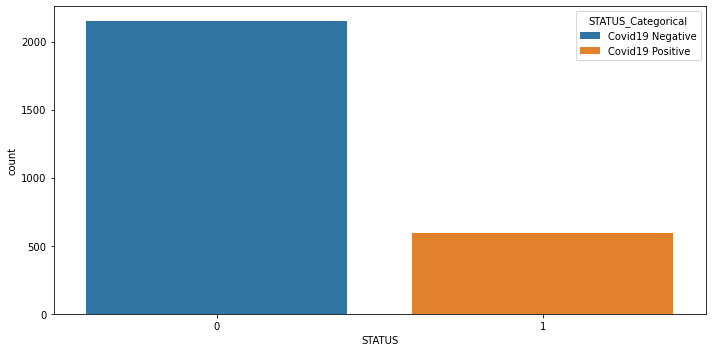

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="STATUS",data=temp,hue=temp["STATUS_Categorical"],dodge=False)
plt.tight_layout()

In [ ]:
positive_df = temp[temp["STATUS"]==1]
negative_df = temp[temp["STATUS"]==0]
print(positive_df.shape," ",negative_df.shape)


(590, 48)   (2151, 48)


In [ ]:
temp.to_csv("temp.csv")
positive_df.to_csv("Positive_Data.csv")
negative_df.to_csv("Negative_Data.csv")

**AUDIO DATA VISUALISATION**

In [ ]:
import IPython
path = temp["Cough Heavy"].iloc[100]
y,sr = librosa.load(path)
IPython.display.Audio(data=y,rate=sr)
#librosa.display.waveplot(y)

Text(0.5, 1.0, 'Wave Form of Audio Sample')

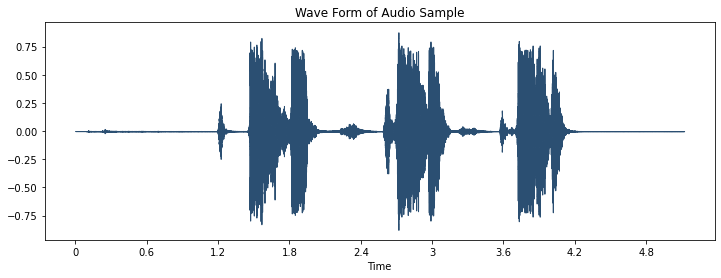

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(y,color='#2B4F72')
plt.title("Wave Form of Audio Sample")

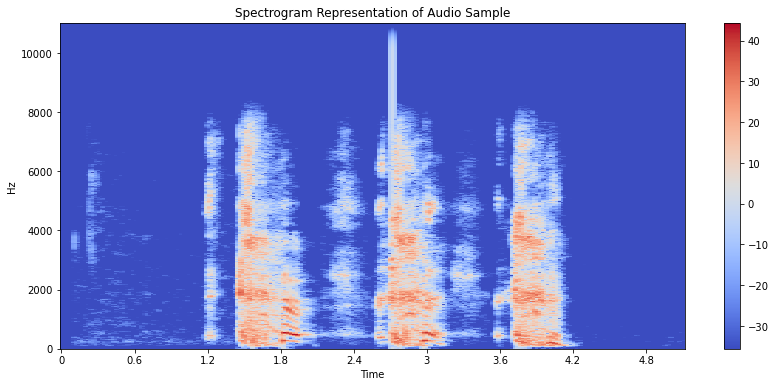

In [ ]:
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.title("Spectrogram Representation of Audio Sample")
plt.colorbar()

In [ ]:
temp.columns

Index(['id', 'Breathing Deep', 'Breathing Shallow', 'Cough Heavy',
       'Cough Shallow', 'Counting Fast', 'Counting Normal', 'MetaDatajson',
       'Vowel-A', 'Vowel-E', 'Vowel-O', 'a', 'covid_status', 'record_date',
       'ep', 'g', 'l_c', 'l_l', 'l_s', 'rU', 'smoker', 'cold', 'ht',
       'diabetes', 'cough', 'ctDate', 'ctScan', 'ctScore', 'diarrhoea',
       'fever', 'loss_of_smell', 'mp', 'testType', 'test_date', 'test_status',
       'um', 'vacc', 'bd', 'others_resp', 'ftg', 'st', 'ihd', 'asthma',
       'others_preexist', 'cld', 'pneumonia', 'STATUS', 'STATUS_Categorical'],
      dtype='object')

In [ ]:
print(negative_df.iloc[100]["STATUS"])
print(positive_df.iloc[100]["STATUS"])
lst = ['Breathing Deep', 'Breathing Shallow', 'Cough Heavy','Cough Shallow', 'Counting Fast', 'Counting Normal','Vowel-A', 'Vowel-E', 'Vowel-O']

0
1


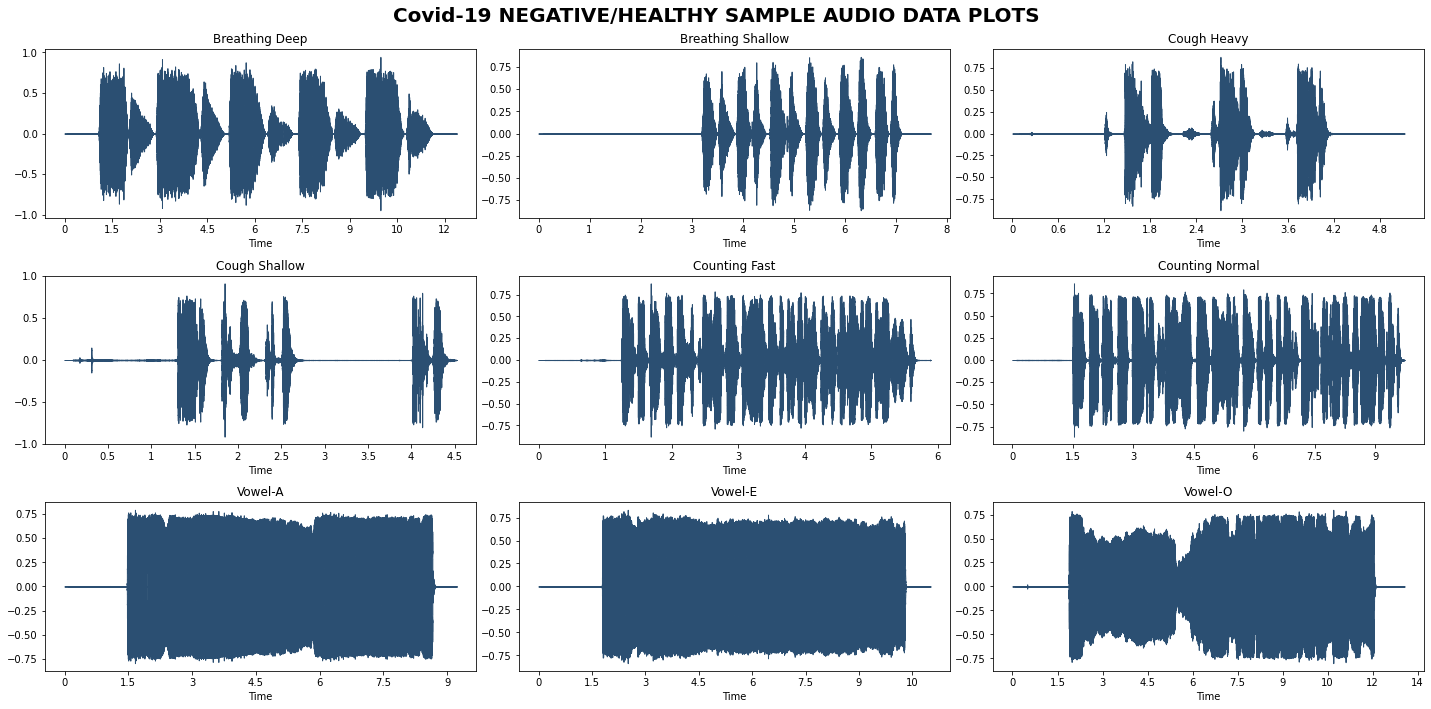

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(lst)):
    plt.subplot(3,3,i+1)
    path = negative_df[lst[i]].iloc[100]
    y,sr = librosa.load(path)
    librosa.display.waveshow(y,color='#2B4F72')
    plt.title(lst[i])
plt.suptitle("Covid-19 NEGATIVE/HEALTHY SAMPLE AUDIO DATA PLOTS",fontsize=20,fontweight ="bold")
plt.tight_layout()

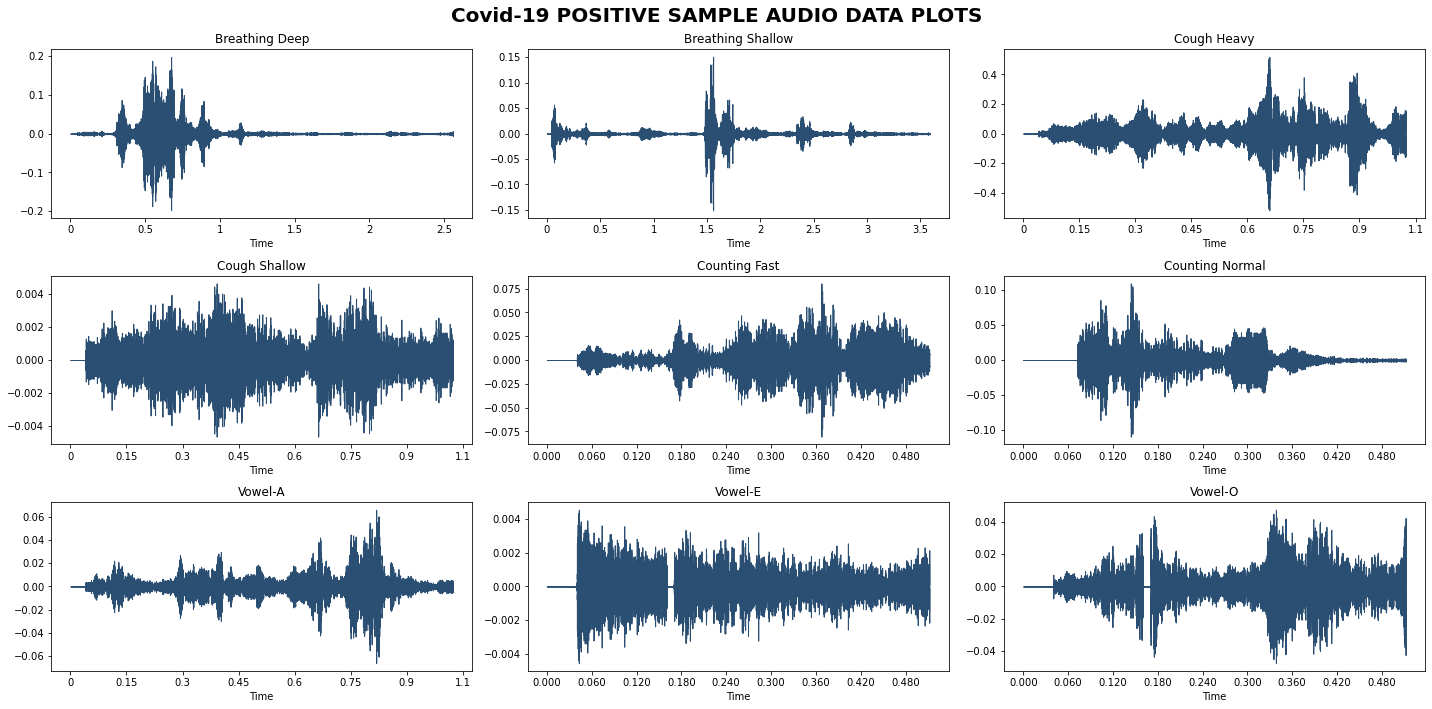

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(lst)):
    plt.subplot(3,3,i+1)
    path = positive_df[lst[i]].iloc[100]
    y,sr = librosa.load(path)
    librosa.display.waveshow(y,color='#2B4F72')
    plt.title(lst[i])
plt.suptitle("Covid-19 POSITIVE SAMPLE AUDIO DATA PLOTS",fontsize=20,fontweight ="bold")
plt.tight_layout()

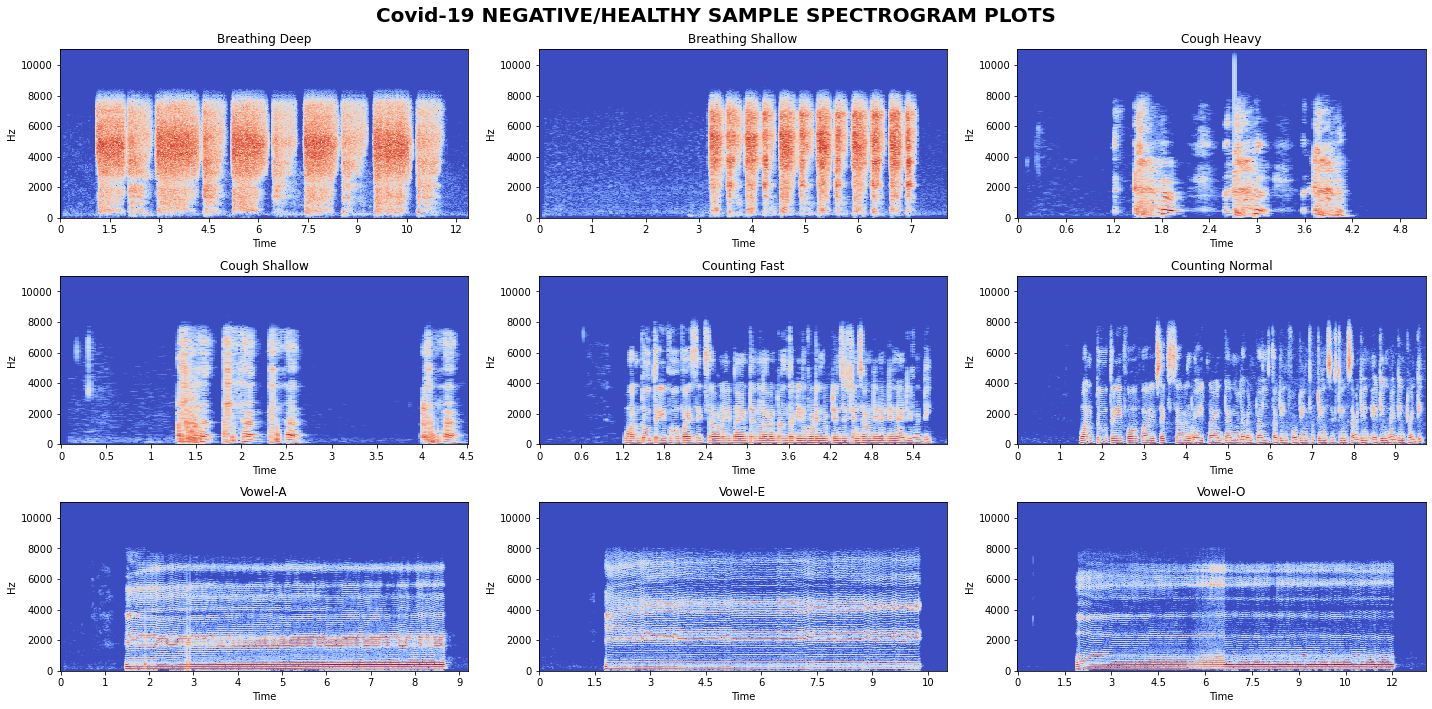

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(lst)):
    plt.subplot(3,3,i+1)
    path = negative_df[lst[i]].iloc[100]
    y,sr = librosa.load(path)
    stft = librosa.stft(y)
    stft_db = librosa.amplitude_to_db(abs(stft))
    librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
    plt.title(lst[i])
plt.suptitle("Covid-19 NEGATIVE/HEALTHY SAMPLE SPECTROGRAM PLOTS",fontsize=20,fontweight ="bold")
plt.tight_layout()

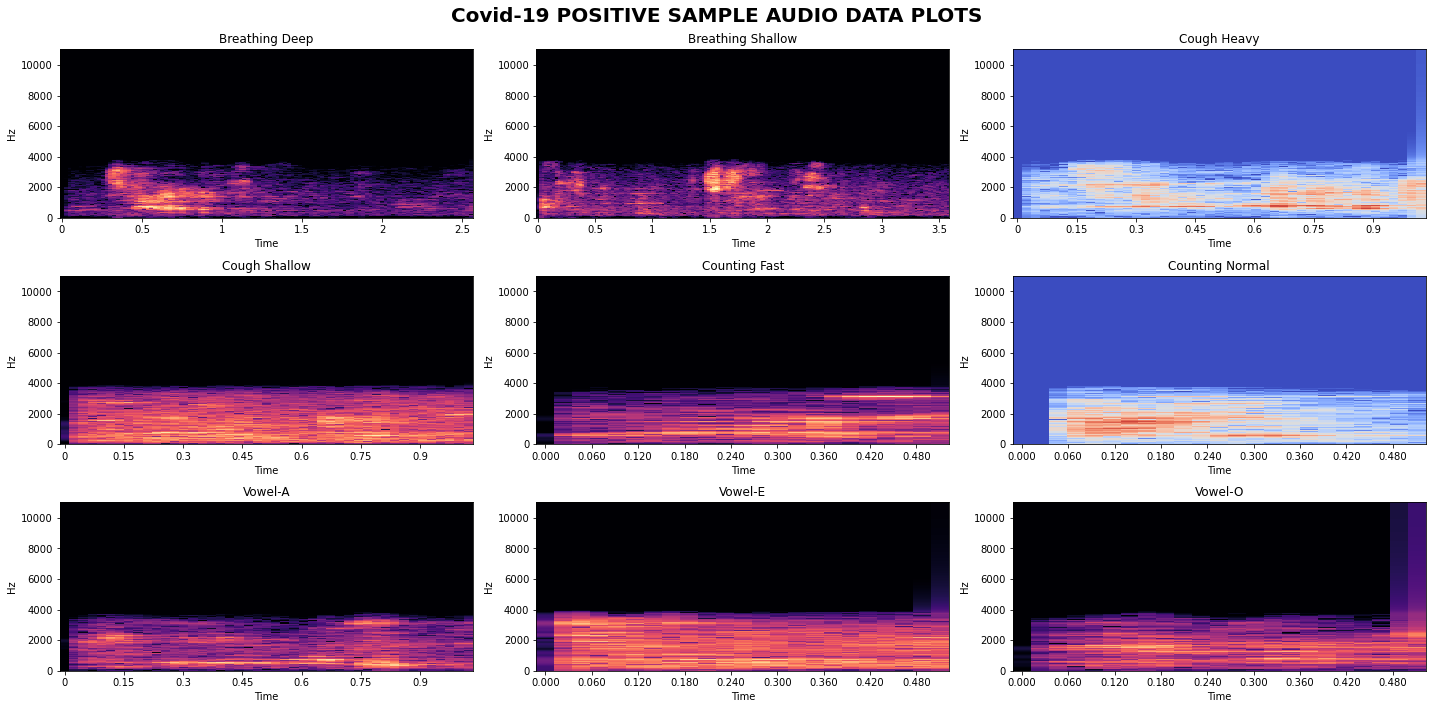

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(lst)):
    plt.subplot(3,3,i+1)
    path = positive_df[lst[i]].iloc[100]
    y,sr = librosa.load(path)
    stft = librosa.stft(y)
    stft_db = librosa.amplitude_to_db(abs(stft))
    librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
    plt.title(lst[i])
plt.suptitle("Covid-19 POSITIVE SAMPLE AUDIO DATA PLOTS",fontsize=20,fontweight ="bold")
plt.tight_layout()

**CONVERTING EACH AUDIO SAMPLE TO MFCC'S from which we extract features**

In [ ]:
temp.columns

Index(['id', 'Breathing Deep', 'Breathing Shallow', 'Cough Heavy',
       'Cough Shallow', 'Counting Fast', 'Counting Normal', 'MetaDatajson',
       'Vowel-A', 'Vowel-E', 'Vowel-O', 'a', 'covid_status', 'record_date',
       'ep', 'g', 'l_c', 'l_l', 'l_s', 'rU', 'smoker', 'cold', 'ht',
       'diabetes', 'cough', 'ctDate', 'ctScan', 'ctScore', 'diarrhoea',
       'fever', 'loss_of_smell', 'mp', 'testType', 'test_date', 'test_status',
       'um', 'vacc', 'bd', 'others_resp', 'ftg', 'st', 'ihd', 'asthma',
       'others_preexist', 'cld', 'pneumonia', 'STATUS', 'STATUS_Categorical'],
      dtype='object')

In [ ]:
''' Extracting MFCC's from audio waveforms'''
def feature_extractor(row):
    name     = row[0]
    try:
        audio,sr = librosa.load(row[5]) # Counting Fast
        audio = 0.9 *(audio/max(audio)) # doing normalization
        #For MFCCS 
        mfccs    = librosa.feature.mfcc(y=audio,sr=sr, n_mfcc=39)
        mfccsscaled = np.mean(mfccs.T,axis=0)
    
        #Mel Spectogram
        pylab.axis('off') # no axis
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
        melspec  = librosa.feature.melspectrogram(y=audio,sr=sr)
        s_db     = librosa.power_to_db(melspec, ref=np.max)
        librosa.display.specshow(s_db)

        savepath = os.path.join('COUNTINGFAST_Noramlized_MFCCS',name+'.png')
        pylab.savefig(savepath, bbox_inches=None, pad_inches=0)
        pylab.close()
    except:
        print('File cannot open')
        return None,None
    return mfccsscaled,savepath

features = []
diagnoses= []
imgpaths = []

In [ ]:
for row in tqdm(temp.values):
   mfccs,savepath  = feature_extractor(row)
   features.append(mfccs)
   imgpaths.append(savepath)

  0%|          | 5/2741 [00:03<30:21,  1.50it/s]C:\Users\muthi\AppData\Local\Temp\ipykernel_16124\3979292084.py:6: RuntimeWarning: invalid value encountered in true_divide
  audio = 0.9 *(audio/max(audio)) # doing normalization
  0%|          | 6/2741 [00:03<26:03,  1.75it/s]

File cannot open


  0%|          | 13/2741 [00:07<27:08,  1.68it/s]

File cannot open


  1%|          | 33/2741 [00:21<28:51,  1.56it/s]

File cannot open


  2%|▏         | 57/2741 [00:37<29:36,  1.51it/s]

File cannot open


  2%|▏         | 59/2741 [00:39<35:55,  1.24it/s]

File cannot open


  2%|▏         | 60/2741 [00:40<33:19,  1.34it/s]

File cannot open


  2%|▏         | 63/2741 [00:41<27:30,  1.62it/s]

File cannot open


  2%|▏         | 64/2741 [00:42<23:43,  1.88it/s]

File cannot open


  2%|▏         | 67/2741 [00:43<22:04,  2.02it/s]

File cannot open


  3%|▎         | 76/2741 [00:48<25:01,  1.78it/s]

File cannot open


  4%|▍         | 111/2741 [01:10<27:40,  1.58it/s]

File cannot open


  5%|▍         | 134/2741 [01:27<36:30,  1.19it/s]

File cannot open


  7%|▋         | 192/2741 [02:02<24:12,  1.76it/s]

File cannot open


  7%|▋         | 204/2741 [02:09<21:24,  1.98it/s]

File cannot open


  8%|▊         | 214/2741 [02:16<29:15,  1.44it/s]

File cannot open


  9%|▉         | 260/2741 [02:50<31:21,  1.32it/s]

File cannot open


 10%|█         | 281/2741 [03:03<25:18,  1.62it/s]

File cannot open


 11%|█         | 292/2741 [03:10<27:37,  1.48it/s]

File cannot open


 12%|█▏        | 320/2741 [03:29<24:51,  1.62it/s]

File cannot open


 12%|█▏        | 337/2741 [03:41<27:34,  1.45it/s]

File cannot open


 13%|█▎        | 361/2741 [03:57<28:50,  1.38it/s]

File cannot open


 14%|█▍        | 380/2741 [04:10<26:14,  1.50it/s]

File cannot open
File cannot open


 14%|█▍        | 391/2741 [04:16<27:51,  1.41it/s]

File cannot open


 15%|█▍        | 404/2741 [04:26<35:25,  1.10it/s]

File cannot open


 18%|█▊        | 495/2741 [05:27<22:54,  1.63it/s]

File cannot open


 18%|█▊        | 498/2741 [05:29<20:27,  1.83it/s]

File cannot open


 20%|█▉        | 537/2741 [05:55<22:38,  1.62it/s]

File cannot open


 22%|██▏       | 607/2741 [06:38<21:16,  1.67it/s]

File cannot open


 25%|██▍       | 672/2741 [07:18<20:31,  1.68it/s]

File cannot open


 26%|██▌       | 717/2741 [07:42<14:26,  2.34it/s]

File cannot open


 28%|██▊       | 781/2741 [08:21<19:57,  1.64it/s]

File cannot open


 29%|██▉       | 793/2741 [08:27<19:04,  1.70it/s]

File cannot open


 30%|██▉       | 819/2741 [08:43<17:34,  1.82it/s]

File cannot open


 32%|███▏      | 864/2741 [09:09<18:42,  1.67it/s]

File cannot open


 34%|███▍      | 944/2741 [09:58<16:05,  1.86it/s]

File cannot open


 35%|███▌      | 968/2741 [10:13<16:57,  1.74it/s]

File cannot open


 36%|███▌      | 988/2741 [10:24<16:35,  1.76it/s]

File cannot open


 39%|███▉      | 1065/2741 [11:08<14:48,  1.89it/s]

File cannot open


 40%|███▉      | 1087/2741 [11:23<18:57,  1.45it/s]

File cannot open


 41%|████      | 1119/2741 [11:42<14:39,  1.84it/s]

File cannot open


 42%|████▏     | 1144/2741 [11:57<16:24,  1.62it/s]

File cannot open


 43%|████▎     | 1175/2741 [12:14<15:11,  1.72it/s]

File cannot open


 44%|████▎     | 1193/2741 [12:24<15:22,  1.68it/s]

File cannot open
File cannot open


 44%|████▍     | 1212/2741 [12:33<11:43,  2.17it/s]

File cannot open


 46%|████▌     | 1263/2741 [13:00<07:11,  3.43it/s]

File cannot open


 46%|████▋     | 1271/2741 [13:04<12:48,  1.91it/s]

File cannot open


 47%|████▋     | 1281/2741 [13:09<14:12,  1.71it/s]

File cannot open


 53%|█████▎    | 1447/2741 [14:46<09:35,  2.25it/s]

File cannot open


 53%|█████▎    | 1456/2741 [14:51<12:39,  1.69it/s]

File cannot open


 55%|█████▍    | 1501/2741 [15:16<09:47,  2.11it/s]

File cannot open


 56%|█████▌    | 1539/2741 [15:38<09:12,  2.18it/s]

File cannot open


 58%|█████▊    | 1599/2741 [16:12<11:23,  1.67it/s]

File cannot open


 64%|██████▎   | 1746/2741 [17:46<10:58,  1.51it/s]

File cannot open


 69%|██████▉   | 1903/2741 [19:17<07:23,  1.89it/s]

File cannot open


 70%|██████▉   | 1917/2741 [19:24<06:10,  2.22it/s]

File cannot open


 71%|███████   | 1944/2741 [19:37<06:37,  2.00it/s]

File cannot open


 71%|███████▏  | 1956/2741 [19:42<05:25,  2.41it/s]

File cannot open


 72%|███████▏  | 1981/2741 [19:55<05:42,  2.22it/s]

File cannot open


 74%|███████▎  | 2016/2741 [20:12<05:03,  2.39it/s]

File cannot open


 74%|███████▍  | 2030/2741 [20:19<05:13,  2.27it/s]

File cannot open


 74%|███████▍  | 2037/2741 [20:22<04:35,  2.55it/s]

File cannot open
File cannot open


 74%|███████▍  | 2042/2741 [20:24<04:55,  2.36it/s]

File cannot open


 75%|███████▍  | 2044/2741 [20:26<06:08,  1.89it/s]

File cannot open


 75%|███████▍  | 2046/2741 [20:27<05:36,  2.07it/s]

File cannot open


 75%|███████▍  | 2047/2741 [20:27<04:43,  2.45it/s]

File cannot open


 75%|███████▍  | 2048/2741 [20:27<04:23,  2.63it/s]

File cannot open


 75%|███████▍  | 2049/2741 [20:28<04:13,  2.73it/s]

File cannot open


 75%|███████▌  | 2057/2741 [20:31<04:44,  2.40it/s]

File cannot open


 75%|███████▌  | 2065/2741 [20:36<05:11,  2.17it/s]

File cannot open


 75%|███████▌  | 2069/2741 [20:37<04:45,  2.35it/s]

File cannot open


 76%|███████▌  | 2073/2741 [20:39<05:01,  2.21it/s]

File cannot open


 76%|███████▌  | 2074/2741 [20:40<04:47,  2.32it/s]

File cannot open


 76%|███████▌  | 2081/2741 [20:44<05:16,  2.09it/s]

File cannot open


 76%|███████▌  | 2086/2741 [20:46<04:45,  2.29it/s]

File cannot open


 76%|███████▋  | 2094/2741 [20:50<04:50,  2.23it/s]

File cannot open


 77%|███████▋  | 2106/2741 [20:55<04:45,  2.23it/s]

File cannot open


 77%|███████▋  | 2113/2741 [20:59<05:10,  2.02it/s]

File cannot open


 77%|███████▋  | 2114/2741 [20:59<04:35,  2.28it/s]

File cannot open


 78%|███████▊  | 2126/2741 [21:05<05:19,  1.92it/s]

File cannot open


 78%|███████▊  | 2129/2741 [21:06<04:27,  2.29it/s]

File cannot open


 78%|███████▊  | 2144/2741 [21:14<04:21,  2.28it/s]

File cannot open


 78%|███████▊  | 2151/2741 [21:18<04:42,  2.09it/s]

File cannot open


 79%|███████▊  | 2158/2741 [21:22<05:19,  1.82it/s]

File cannot open


 79%|███████▉  | 2165/2741 [21:26<04:36,  2.08it/s]

File cannot open


 79%|███████▉  | 2166/2741 [21:26<04:09,  2.30it/s]

File cannot open


 81%|████████  | 2207/2741 [21:49<04:21,  2.04it/s]

File cannot open


 81%|████████  | 2214/2741 [21:52<04:21,  2.01it/s]

File cannot open


 81%|████████  | 2216/2741 [21:53<03:43,  2.35it/s]

File cannot open


 81%|████████  | 2224/2741 [21:57<03:45,  2.30it/s]

File cannot open


 81%|████████  | 2225/2741 [21:57<03:44,  2.29it/s]

File cannot open


 83%|████████▎ | 2268/2741 [22:21<04:19,  1.83it/s]

File cannot open


 83%|████████▎ | 2276/2741 [22:25<03:47,  2.05it/s]

File cannot open


 84%|████████▍ | 2307/2741 [22:40<03:55,  1.84it/s]

File cannot open


 85%|████████▍ | 2317/2741 [22:44<03:10,  2.22it/s]

File cannot open


 86%|████████▌ | 2363/2741 [23:08<02:40,  2.36it/s]

File cannot open


 86%|████████▋ | 2370/2741 [23:12<02:54,  2.13it/s]

File cannot open


 87%|████████▋ | 2382/2741 [23:17<02:58,  2.01it/s]

File cannot open


 90%|████████▉ | 2457/2741 [23:54<02:24,  1.96it/s]

File cannot open


 90%|████████▉ | 2463/2741 [23:57<02:12,  2.10it/s]

File cannot open


 90%|█████████ | 2472/2741 [24:01<02:30,  1.79it/s]

File cannot open


 91%|█████████ | 2500/2741 [24:14<01:36,  2.49it/s]

File cannot open


 95%|█████████▌| 2614/2741 [25:14<01:03,  2.00it/s]

File cannot open


 97%|█████████▋| 2667/2741 [25:43<00:38,  1.91it/s]

File cannot open


 98%|█████████▊| 2692/2741 [25:55<00:25,  1.90it/s]

File cannot open


 98%|█████████▊| 2696/2741 [25:56<00:18,  2.49it/s]

File cannot open


100%|█████████▉| 2729/2741 [26:13<00:06,  1.90it/s]

File cannot open


100%|█████████▉| 2736/2741 [26:16<00:02,  1.87it/s]

File cannot open


100%|██████████| 2741/2741 [26:18<00:00,  1.74it/s]


**Extracting Features from these spectograms using VGG19-Transfer Learning Approach**

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from tensorflow.keras.preprocessing import image
import glob

In [ ]:
base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('flatten').output)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
images_paths = glob.glob('Cough_Shallow_noramlized_MFCCS\\\*.png')
img_df = pd.DataFrame(columns=['id','Image Path'])

In [ ]:
for x in images_paths:
    print(x.split('\\')[1][:-4])
    img_df.loc[len(img_df)] = [x.split('\\')[1][:-4],x]
img_df.head()

00xKcQMmcAhX8CODgBBLOe7Dm0T2
01GtHP1FUbXKdWEUwApFdusuO773
01n0u9YSkXQSkmN45J65eigyCMC3
01OCEf1yB4czsq8ygRoT51s96Ba2
03TmwzsdEBVEh35MRMbC9d0NnfI3
05acPS4aRGfvuOfku11Za8zve8i2
05bieNLXPuaIWEVaX81EkbbjVrh1
08tlSbvXpAggZavIGW994adhh1m1
0B1rE91KabdId1lUmWJB7NLg8OP2
0bcMNFt3dlPlUPTyCO8DVAlbTUC3
0c00ybTdnIRUTXeg20bZjJOzhKv1
0drfnqVwccT6UmgVLQEuyVglDC23
0EAAFsDWfTcrhktHy78LS6nf19G3
0eQAE4NgLUWYqAaMuWoO4XgIgvF2
0gB18cWHioTobGuU3qVE0QV5mBN2
0Ha52POVIxTKEPqI1eGpIoMHUd52
0HIgO2EhOOW1msCbEw1kC8Qsx6D3
0kFnp420ZNR1jLp0JWCjMGDzvXo2
0KOy96zEUfdMY4rZzwrDT0gMPDa2
0kQAWAGJHffg9kZhji65QkUaEvx1
0KSi2atlmsXNcGMfpDNzIjJSvC23
0kuAzowu97fM1RkiMFwKUE2QsHC2
0l20TKQIqBOGwH8Tcr2iD3SRWRv1
0mGUoJiJnuhfNodzOrMwjcGftPD2
0MVnLUuWMBdzmvRDgLvi4TRl4Zf1
0nP3dtfFxhMihttAMq1eoho5KaU2
0Nuh8uDalHe47HGM31i2Ew6BPcl1
0pqMnxeSybfQnGV9nHW3P69FSzE3
0RHdUsu2qFMmG4dhpJd1NqM5ZTC2
0Rlzhiz6bybk77wdLjxwy7yLDhg1
0sIeyohqXMOGTqPA7RiiuyJ3AOt2
0ujmfEsuhJRsGfbW3ttpSMjwJi73
0VpjgRGE5kR8uTEhksBgvFR3xlA2
0W7xMFW538WmDghkiujx2v4xVnt2
0xsz0lbpsoVgfo

,id,Image Path
0,00xKcQMmcAhX8CODgBBLOe7Dm0T2,Cough_Shallow_noramlized_MFCCS\00xKcQMmcAhX8CO...
1,01GtHP1FUbXKdWEUwApFdusuO773,Cough_Shallow_noramlized_MFCCS\01GtHP1FUbXKdWE...
2,01n0u9YSkXQSkmN45J65eigyCMC3,Cough_Shallow_noramlized_MFCCS\01n0u9YSkXQSkmN...
3,01OCEf1yB4czsq8ygRoT51s96Ba2,Cough_Shallow_noramlized_MFCCS\01OCEf1yB4czsq8...
4,03TmwzsdEBVEh35MRMbC9d0NnfI3,Cough_Shallow_noramlized_MFCCS\03TmwzsdEBVEh35...


In [ ]:
total_df=pd.merge(img_df,temp, how='inner', on = 'id')
total_df.head()

,id,Image Path,Breathing Deep,Breathing Shallow,Cough Heavy,Cough Shallow,Counting Fast,Counting Normal,MetaDatajson,Vowel-A,...,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia,STATUS,STATUS_Categorical
0,00xKcQMmcAhX8CODgBBLOe7Dm0T2,Cough_Shallow_noramlized_MFCCS\00xKcQMmcAhX8CO...,Extracted_data\20210406\00xKcQMmcAhX8CODgBBLOe...,Extracted_data\20210406\00xKcQMmcAhX8CODgBBLOe...,Extracted_data\20210406\00xKcQMmcAhX8CODgBBLOe...,Extracted_data\20210406\00xKcQMmcAhX8CODgBBLOe...,Extracted_data\20210406\00xKcQMmcAhX8CODgBBLOe...,Extracted_data\20210406\00xKcQMmcAhX8CODgBBLOe...,Extracted_data\20210406\00xKcQMmcAhX8CODgBBLOe...,Extracted_data\20210406\00xKcQMmcAhX8CODgBBLOe...,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,1,Covid19 Positive
1,01GtHP1FUbXKdWEUwApFdusuO773,Cough_Shallow_noramlized_MFCCS\01GtHP1FUbXKdWE...,Extracted_data\20220224\01GtHP1FUbXKdWEUwApFdu...,Extracted_data\20220224\01GtHP1FUbXKdWEUwApFdu...,Extracted_data\20220224\01GtHP1FUbXKdWEUwApFdu...,Extracted_data\20220224\01GtHP1FUbXKdWEUwApFdu...,Extracted_data\20220224\01GtHP1FUbXKdWEUwApFdu...,Extracted_data\20220224\01GtHP1FUbXKdWEUwApFdu...,Extracted_data\20220224\01GtHP1FUbXKdWEUwApFdu...,Extracted_data\20220224\01GtHP1FUbXKdWEUwApFdu...,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,0,Covid19 Negative
2,01n0u9YSkXQSkmN45J65eigyCMC3,Cough_Shallow_noramlized_MFCCS\01n0u9YSkXQSkmN...,Extracted_data\20210816\01n0u9YSkXQSkmN45J65ei...,Extracted_data\20210816\01n0u9YSkXQSkmN45J65ei...,Extracted_data\20210816\01n0u9YSkXQSkmN45J65ei...,Extracted_data\20210816\01n0u9YSkXQSkmN45J65ei...,Extracted_data\20210816\01n0u9YSkXQSkmN45J65ei...,Extracted_data\20210816\01n0u9YSkXQSkmN45J65ei...,Extracted_data\20210816\01n0u9YSkXQSkmN45J65ei...,Extracted_data\20210816\01n0u9YSkXQSkmN45J65ei...,...,NaN,NaN,NaN,NaN,True,NaN,True,True,0,Covid19 Negative
3,01OCEf1yB4czsq8ygRoT51s96Ba2,Cough_Shallow_noramlized_MFCCS\01OCEf1yB4czsq8...,Extracted_data\20200820\01OCEf1yB4czsq8ygRoT51...,Extracted_data\20200820\01OCEf1yB4czsq8ygRoT51...,Extracted_data\20200820\01OCEf1yB4czsq8ygRoT51...,Extracted_data\20200820\01OCEf1yB4czsq8ygRoT51...,Extracted_data\20200820\01OCEf1yB4czsq8ygRoT51...,Extracted_data\20200820\01OCEf1yB4czsq8ygRoT51...,Extracted_data\20200820\01OCEf1yB4czsq8ygRoT51...,Extracted_data\20200820\01OCEf1yB4czsq8ygRoT51...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Covid19 Negative
4,03TmwzsdEBVEh35MRMbC9d0NnfI3,Cough_Shallow_noramlized_MFCCS\03TmwzsdEBVEh35...,Extracted_data\20200415\03TmwzsdEBVEh35MRMbC9d...,Extracted_data\20200415\03TmwzsdEBVEh35MRMbC9d...,Extracted_data\20200415\03TmwzsdEBVEh35MRMbC9d...,Extracted_data\20200415\03TmwzsdEBVEh35MRMbC9d...,Extracted_data\20200415\03TmwzsdEBVEh35MRMbC9d...,Extracted_data\20200415\03TmwzsdEBVEh35MRMbC9d...,Extracted_data\20200415\03TmwzsdEBVEh35MRMbC9d...,Extracted_data\20200415\03TmwzsdEBVEh35MRMbC9d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Covid19 Negative


In [ ]:
total_df.to_csv("total_df_Counting_Fast.csv")

In [ ]:
def get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    flatten = model.predict(x)
    return list(flatten[0])

In [ ]:
x =[]
y = []
for i in range(len(total_df)):
   # print(total_df['Image Path'].loc[i]," ",total_df["STATUS"].loc[i])
    path = total_df['Image Path'].loc[i]
    label = total_df["STATUS"].loc[i]
    feat = get_features(path)
    x.append(feat)
    y.append(label)

In [ ]:
dataFrame  = pd.DataFrame(columns = list(np.arange(0,25088)))
for d in x:
  dataFrame.loc[len(df.index)] = d
dataFrame["Labels"] = y
dataFrame.to_csv("Counting_Fast_extracted_data.csv")

In [ ]:
dataFrame.head()

In [ ]:
print("Total Samples: "len(x), " Total number of features extracted from each sample: "x[0].shape)

In [ ]:
x = np.array(x)
x = np.squeeze(x)
y = np.array(y)

**Performing Classification on Extracted Features**

In [ ]:
features_df =pd.read_csv("Counting_Fast_extracted_data.csv")

In [ ]:
features_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,Labels
0,0,0.0,0.0,0.0,1.631152,46.325245,0.000000,0.0,0.0,0.0,...,42.320720,0.0,0.000000,55.635742,0.00000,6.664539,0.0,0.0,0.000000,1
1,1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,7.244321,0.0,16.016674,46.271107,0.00000,0.000000,0.0,0.0,0.000000,0
2,2,0.0,0.0,0.0,0.000000,8.574386,5.873706,0.0,0.0,0.0,...,6.347337,0.0,0.000000,0.000000,0.00000,0.408609,0.0,0.0,0.000000,0
3,3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,8.168976,0.00000,0.000000,0.0,0.0,0.000000,0
4,4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.354042,0.0,3.565320,62.024395,17.98605,0.000000,0.0,0.0,8.370072,0


In [ ]:
sum_df = pd.DataFrame(columns=["SUM","Label"])
for i in range(len(features_df)):
    sum_df.loc[len(sum_df.index)]=sum(features_df.loc[i][:-1]),features_df.loc[i]["Labels"]
print(sum_df[sum_df["Label"]==1].describe())
print(sum_df[sum_df["Label"]==0].describe())

                SUM  Label
count    576.000000  576.0
mean   45373.703073    1.0
std     7159.714494    0.0
min    16464.525307    1.0
25%    41556.729040    1.0
50%    46233.209262    1.0
75%    49990.868397    1.0
max    65415.289754    1.0
                SUM   Label
count   2055.000000  2055.0
mean   45499.355586     0.0
std     6418.171593     0.0
min     5949.666077     0.0
25%    42098.736743     0.0
50%    46000.934835     0.0
75%    49660.740639     0.0
max    66788.688095     0.0


In [ ]:
X = features_df[features_df.columns[1:-1]] # Same data as x ..just loading from csv file.
y = features_df["Labels"]
print(X.head()," ",y.head())

     0    1    2         3          4         5    6    7    8    9  ...  \
0  0.0  0.0  0.0  1.631152  46.325245  0.000000  0.0  0.0  0.0  0.0  ...   
1  0.0  0.0  0.0  0.000000   0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
2  0.0  0.0  0.0  0.000000   8.574386  5.873706  0.0  0.0  0.0  0.0  ...   
3  0.0  0.0  0.0  0.000000   0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
4  0.0  0.0  0.0  0.000000   0.000000  0.000000  0.0  0.0  0.0  0.0  ...   

       25078      25079  25080      25081      25082     25083     25084  \
0   5.855288  42.320720    0.0   0.000000  55.635742   0.00000  6.664539   
1   0.000000   7.244321    0.0  16.016674  46.271107   0.00000  0.000000   
2   0.000000   6.347337    0.0   0.000000   0.000000   0.00000  0.408609   
3  20.500902   0.000000    0.0   0.000000   8.168976   0.00000  0.000000   
4  28.721384   0.354042    0.0   3.565320  62.024395  17.98605  0.000000   

   25085  25086     25087  
0    0.0    0.0  0.000000  
1    0.0    0.0  0.000000  
2 

In [ ]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\muthi\.conda\envs\vggish

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2022.4.26-~ --> conda-forge::ca-certificates-2022.5.18.1-h5b45459_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            pkgs/main::certifi-2022.5.18.1-py38ha~ --

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

print(imblearn.__version__)

#X, X_val, y, y_val = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
#print(X_val.shape[0]," number of sample for validation - Unseen Data")


0.7.0


In [ ]:
counter = Counter(y)
print("Current Sample distribution: ",counter)

Current Sample distribution:  Counter({0: 1849, 1: 518})


In [ ]:
# transform the dataset
oversample = SMOTE()
X_rs, y_rs = oversample.fit_resample(X, y)
counter = Counter(y_rs)
print("Sample Distribution After Applying Synthetic Minority Over Sampling-SMOTE ",counter)

Sample Distribution After Applying Synthetic Minority Over Sampling-SMOTE  Counter({0: 1849, 1: 1849})


In [ ]:
# summarize the new class distribution
print(X_rs.shape)
print(y_rs.shape)
print("Now Available data excluding validation set is ",X_rs.shape[0]," no of Examples")

(3698, 25088)
(3698,)
Now Available data excluding validation set is  3698  no of Examples


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.15, random_state=42, stratify=y_rs)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV

clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5,max_iter=300))

#clf =make_pipeline(StandardScaler(),LogisticRegression(random_state=0,penalty='l1',solver="liblinear"))
# pip = LinearSVC(random_state=0, tol=1e-5)
# #clf.fit(X_rs, y_rs)
# cv = KFold(n_splits=20,random_state=10,shuffle=True)
# parameters = {'C':np.arange(1,20,1)}
# clf = GridSearchCV(pip,param_grid=parameters,cv=cv)
clf.fit(X_train,y_train)

c:\Users\muthi\.conda\envs\vggish\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(max_iter=300, random_state=0, tol=1e-05))])

In [ ]:
predicted_test = clf.predict(X_test)
print("Test Set Accuracy:",accuracy_score(y_test, predicted_test))
pred_train=clf.predict(X_train)
print("Train Set: ",accuracy_score(y_train, pred_train))

Test Set Accuracy: 0.9279279279279279
Train Set:  1.0


In [ ]:
clf_report = classification_report(y_train,pred_train,labels=[0,1],target_names=["Negative","Positive"],output_dict=True)
pd.DataFrame(clf_report)

,Negative,Positive,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,1571.0,1572.0,1.0,3143.0,3143.0


Text(0.5, 1.0, 'On Training Set')

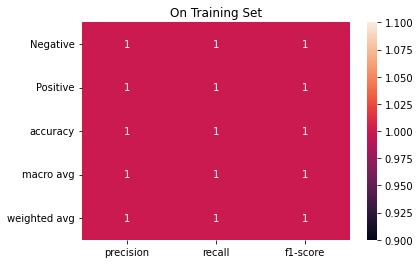

In [ ]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("On Training Set")

Text(0.5, 1.0, 'On Training Set')

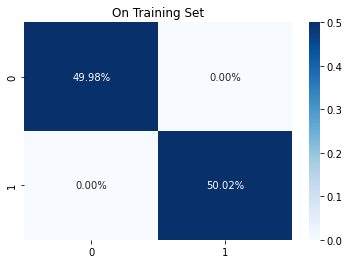

In [ ]:
cf_mat = confusion_matrix(y_train,pred_train)
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, fmt='.2%', cmap='Blues')
plt.title("On Training Set")

In [ ]:
clf_report = classification_report(y_test,predicted_test,labels=[0,1],target_names=["Negative","Positive"],output_dict=True)
pd.DataFrame(clf_report)

,Negative,Positive,accuracy,macro avg,weighted avg
precision,0.979839,0.885993,0.927928,0.932916,0.933001
recall,0.874101,0.981949,0.927928,0.928025,0.927928
f1-score,0.923954,0.931507,0.927928,0.927731,0.927724
support,278.000000,277.000000,0.927928,555.000000,555.000000


Text(0.5, 1.0, 'On Testing Set')

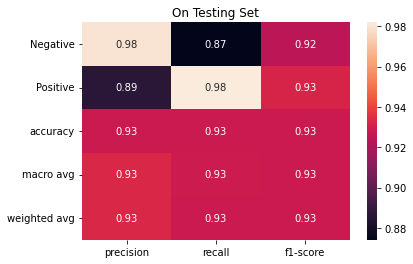

In [ ]:
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("On Testing Set")

Text(0.5, 1.0, 'On Testing Set')

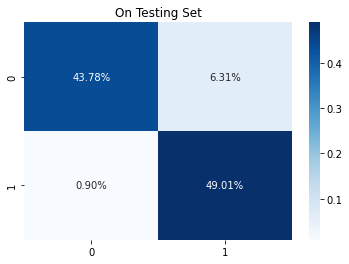

In [ ]:
cf_mat = confusion_matrix(y_test,predicted_test)
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, fmt='.2%', cmap='Blues')
plt.title("On Testing Set")

In [ ]:
# predicted_val = clf.predict(X_val)
# print("Validation Set Accuracy:",accuracy_score(y_val, predicted_val))
# print(classification_report(y_val,predicted_val))
# print(confusion_matrix(y_val,predicted_val))

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_train,pos_label=1)
print("AUC on train set",metrics.auc(fpr, tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_test, pos_label=1)
print("AUC on test set",metrics.auc(fpr, tpr))

# fpr, tpr, thresholds = metrics.roc_curve(y_val,predicted_val,pos_label=1)
# print("AUC on Val set",metrics.auc(fpr, tpr))

AUC on train set 1.0
AUC on test set 0.9280250889541075


In [ ]:
results = pd.DataFrame(columns=["Y_TEST","Pred_TEST"])
results["Y_TEST"] = y_val
results["Pred_TEST"] = predicted_val

In [ ]:
#results

In [ ]:
import pickle
pickle_filename = "linearsvc_model_covid19_countingfast.pkl"
with open(pickle_filename,'wb') as file:
    pickle.dump(clf,file)